In [72]:
import cv2
import numpy as np
import os, time

In [73]:
import matplotlib.pyplot as plt

In [74]:
print(cv2.__version__)

4.0.0


In [75]:
labelsPath = "/home/divyanshu/Desktop/CarTrack/yolo-coco/coco.names"
labels = open(labelsPath).read().strip().split("\n")
weightsPath = "/home/divyanshu/Desktop/CarTrack/yolo-coco/yolov3.weights"
configPath = "/home/divyanshu/Desktop/CarTrack/yolo-coco/yolov3.cfg"
print(len(labels))
print(labels[0:4])

80
['person', 'bicycle', 'car', 'motorbike']


In [76]:
YOLO = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

In [99]:
img = cv2.imread("test3.jpg")
(h,w) = img.shape[:2]
ln = YOLO.getLayerNames()
ln = [ln[i[0] - 1] for i in YOLO.getUnconnectedOutLayers()]
print(ln)

['yolo_82', 'yolo_94', 'yolo_106']


In [100]:
blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB = True, crop = False)
YOLO.setInput(blob)
start = time.time()
layerOutputs = YOLO.forward(ln)
end = time.time()
print(end - start)

1.6660361289978027


In [101]:
boxes = []
confidences = []
classIDs = []

15


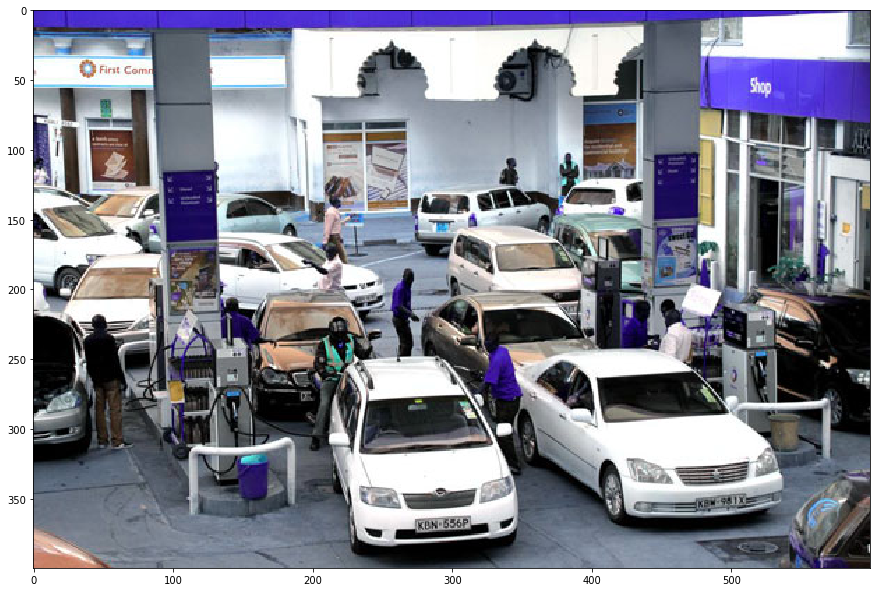

In [106]:
img = cv2.imread("test3.jpg")
boxes = []
confidences = []
classIDs = []
num = 0
for output in layerOutputs:
    for detection in output:
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
        if confidence > 0.6 and labels[classID] == 'car':
            num += 1
#             box = detection[0:4]*np.array([w,h,w,h])
#             (cX, cY, width, height) = box.astype("int")
#             x = int(cX - (width/2))
#             y = int(cY - (height/2))
#             boxes.append([x,y,int(width), int(height)])
#             confidences.append(float(confidence))
#             classIDs.append(classID)
# idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.5)
# if len(idxs) > 0:
#     for i in idxs.flatten():
#         if labels[classIDs[i]] == 'car' and confidences[i] > 0.8:
#             (x,y) = (boxes[i][0], boxes[i][1])
#             (w,h) = (boxes[i][2], boxes[i][3])
#             cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
#             text = "{}: {:.4f}".format(labels[classIDs[i]], confidences[i])
#             print(text)
#             cv2.putText(img, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)
fig, ax1 = plt.subplots(1,1, figsize = (15,15))
ax1.imshow(img)
print(num)